In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function
## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1
def df(x):
    return x*2 + 1

In [4]:
x_1 = np.linspace(start=-3, stop=3, num=500)

## Python Loops & Gradient Descent

In [16]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0000000001

x_list = [new_x]
slope_list = [df(new_x)]


for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print(n)
        break

    x_list.append(new_x)
    slope_list.append(df(new_x))
        
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

102
Local minimum occurs at: -0.49999999963496317
Slope or df(x) value at this point is: 7.300736681870035e-10
f(x) value or cost at this point is: 0.75


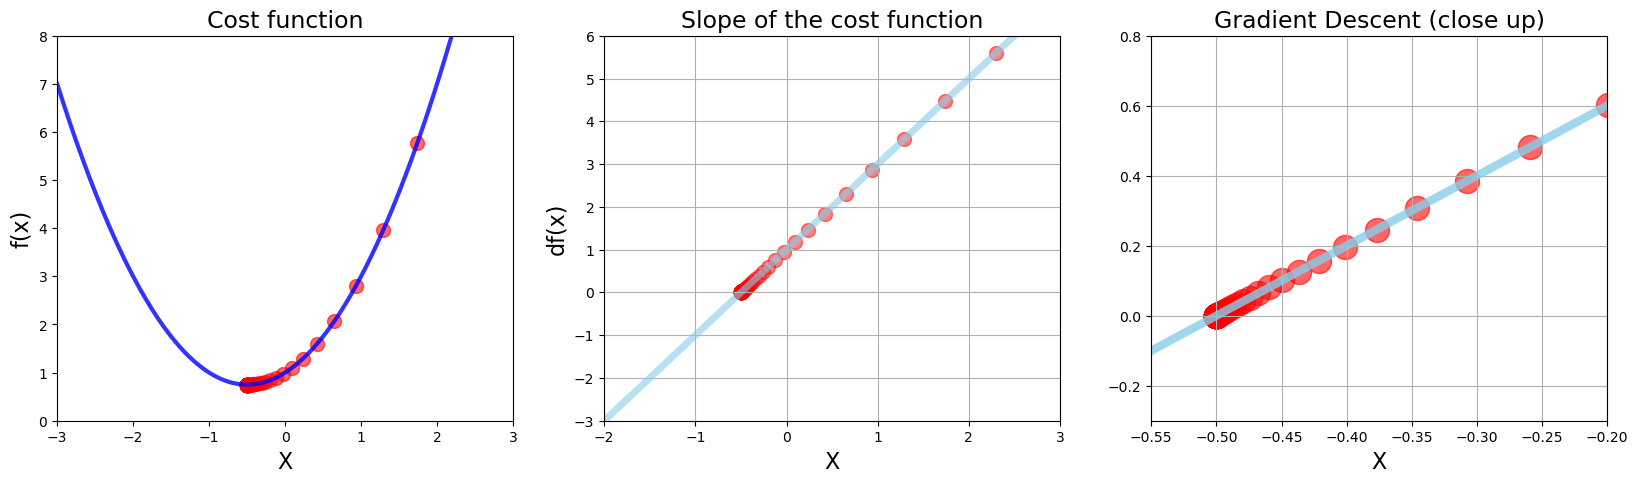

In [17]:
plt.figure(figsize=[20, 5])
# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [18]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8 * x

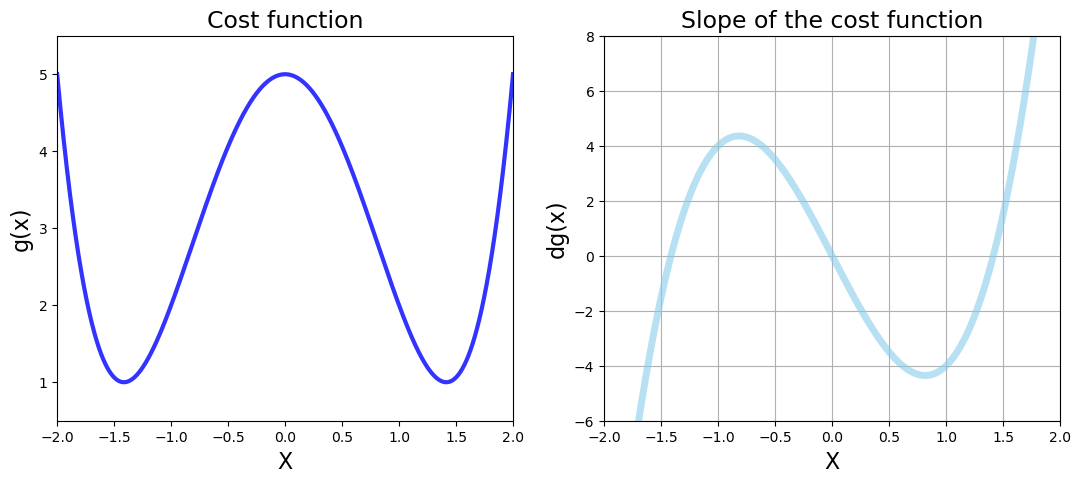

In [21]:
plt.figure(figsize=[20, 5])
# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

# values = np.array(x_list)
# plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
# plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# # 3 Chart: Derivative (Close Up)
# plt.subplot(1, 3, 3)

# plt.title('Gradient Descent (close up)', fontsize=17)
# plt.xlabel('X', fontsize=16)
# plt.grid()
# plt.xlim(-0.55, -0.2)
# plt.ylim(-0.3, 0.8)

# plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
# plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

# plt.show()

## Gradient Descent as a Python Function

In [43]:
# Gradient Descent
def gradient_descent(derivative_function, initial_guess, learning_rate=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
   
    x_list = [new_x]
    slope_list = [derivative_function(new_x)]
    
    
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_function(previous_x)
        new_x = previous_x - learning_rate * gradient
    
        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_function(new_x))
        
        if step_size < precision:
            break
    
        
    return new_x, x_list, slope_list

In [29]:
local_min, list_x, deriv_list = gradient_descent(derivative_function=dg, initial_guess=2)
print('Local min occurs at:', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at: 1.4159909120185952
Number of steps:  14


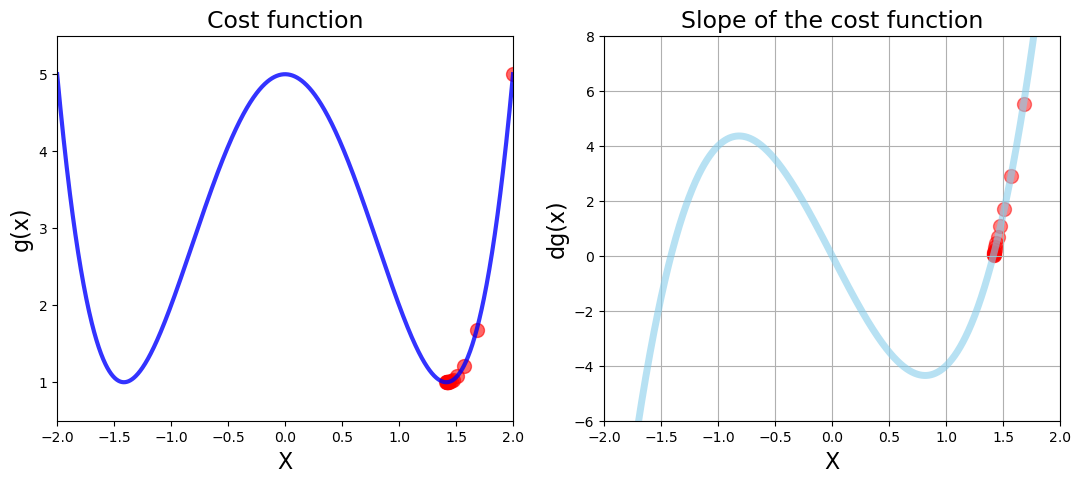

In [30]:
plt.figure(figsize=[20, 5])
# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

# # 3 Chart: Derivative (Close Up)
# plt.subplot(1, 3, 3)

# plt.title('Gradient Descent (close up)', fontsize=17)
# plt.xlabel('X', fontsize=16)
# plt.grid()
# plt.xlim(-0.55, -0.2)
# plt.ylim(-0.3, 0.8)

# plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
# plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

# plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [34]:
#Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 +2

def dh(x):
    return 5*x**4 - 8*x**3

In [48]:
local_min, list_x, deriv_list = gradient_descent(derivative_function=dh, 
                                                 initial_guess=-0.2,
                                                 max_iter=70
                                                )
print('Local min occurs at:', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at: -2071072.4470816324
Number of steps:  71


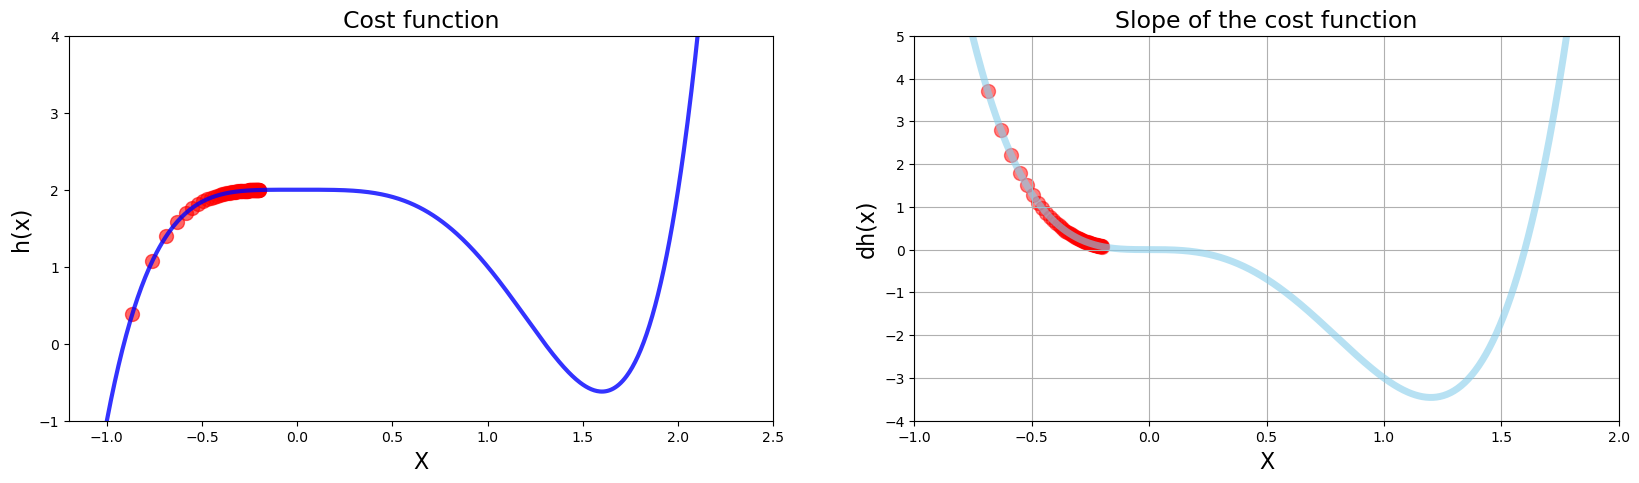

Local min occurs at: -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps:  71


In [49]:
plt.figure(figsize=[20, 5])
# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)
plt.show()

print('Local min occurs at:', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))


# The Learning Rate